# Data management project: Abritel
# Part 2: Visualisation
**By Iman Ajdamova and Pauline Colle**

## Introduction

When chosing accommodation for the holidays, usually people are looking at the best quality-price ratio. People might be willing to pay a higher price but only if is worth it. Therefore, thanks to the data collected with the Webscrapping, we will be able to compare different features together and how they influence each other.

## Import the packages 

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [90]:
from IPython.display import display
import pandas as pd
pd.options.display.max_columns = None # Display all columns of a dataframe
pd.options.display.max_rows = 700

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Data Frame

In [91]:
df = pd.read_excel('C:/Users/32498/Downloads/ECON2206-Data-Management-2023-main/GitHub/Project-data/Abritel_merged.xlsx')

**Creation of a column representing the price per night per person for comparison:**

In [94]:
df['Price person']=df['Price per Night']/df['Number of Guests']
df.tail()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude,Price person
418,3 N appartement,Appartement,0,113.0,1472.0,0.0,0.0,Particulier,6.0,2.0,1.0,Eupen,50.630567,6.031272,18.833333
419,Appartement Van Hecke dans le centre-ville d'A...,Appartement,0,165.0,2143.0,0.0,0.0,Annonce professionnelle,2.0,1.0,0.0,Sint-Andries,51.192022,3.178019,82.500000
420,Villa Oostduinkerke,Villa,0,89.0,1156.0,0.0,0.0,Particulier,6.0,3.0,4.0,Oostduinkerke,51.115634,2.681266,14.833333
421,"Appartement privé sise à Chaussée de Haecht, 3...",Appartement,0,129.0,1678.0,3.5,2.0,Particulier,4.0,2.0,3.0,Collignon,50.867604,4.373712,32.250000
422,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,216.0,2809.0,3.3,3.0,Annonce professionnelle,2.0,1.0,1.0,Quartier du Centre - Centrumwijk,50.846718,4.353221,108.000000


**Converting the required data to type float in order to use them in graphics and maps:**


In [93]:
df['Price per Night'] = df['Price per Night'].astype(float)
df['Total Price'] = df['Total Price'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Appreciations'] = df['Appreciations'].astype(float)

df['Number of Guests'] = df['Number of Guests'].astype(float)
df['Number of Bedrooms'] =df['Number of Bedrooms'].astype(float)
df['Number of Beds'] = df['Number of Beds'].astype(float)
df['Price person']=df['Price person'].astype(float)

## 1. Does the rating impact the price of the location?

### The average prices of rentings based on their rating:

In [95]:
mean_prices = df.groupby('Rating')['Price person'].mean()
mean_prices = df.groupby('Rating')['Price person'].mean()

mean_prices_df = pd.DataFrame({'Rating': mean_prices.index, 'Mean Price': mean_prices.values})
mean_prices_df

,Rating,Mean Price
0,0.0,36.008033
1,1.0,30.450000
2,1.3,25.000000
3,2.0,14.750000
4,2.3,37.200000
5,2.7,20.500000
6,3.0,48.705556
7,3.2,17.500000
8,3.3,60.625000
9,3.4,36.500000


### Plotting the prices and the rating

#### A. Scatterplot

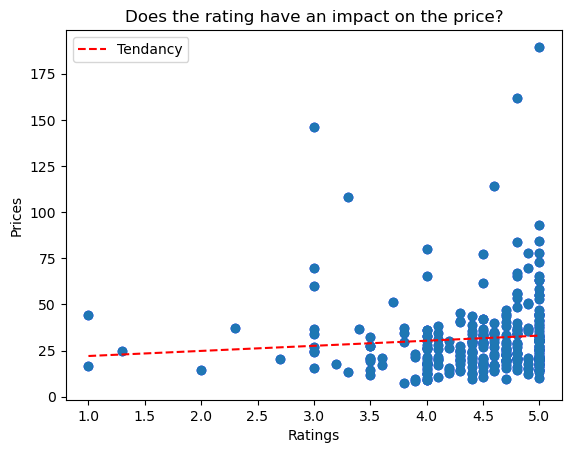

In [96]:
sorted_df = df.copy()
sorted_df = df.sort_values('Rating', ascending=True)
sorted_df = sorted_df[sorted_df['Rating'] != 0]


x = sorted_df["Rating"]
y = sorted_df["Price person"]


x_sorted, y_sorted = zip(*sorted(zip(x, y)))
# Create the scatter plot
plt.scatter(x_sorted, y_sorted, color='blue')


# Fit a linear regression model to the data
model = np.polyfit(x_sorted, y_sorted, 1)
predict = np.poly1d(model)

# Create a range of x values to use for plotting the regression line
x_range = np.linspace(min(x_sorted), max(x_sorted), 100)

# Plot the scatter plot and the regression line
plt.scatter(x_sorted, y_sorted)
plt.plot(x_range, predict(x_range), color='r', linestyle='--', label='Tendancy')

plt.title('Does the rating have an impact on the price?')
plt.xlabel('Ratings')
plt.ylabel('Prices')
plt.legend()

**Observations:**
- The more the rating increase, the more there are observations with higher prices
- The red line shows a slight upward trend in prices when the rating increase but it is not strongly marked.

To have a better representation of the dispersion of the prices according to the rating, let's group the rating to some categories, every 0.5 point. We are going to round the rating to the closest 0.5 value. For example, 4.7 would be approximated to 4.5 and 4.8 to 5.

In [97]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
labels = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Round each value to the nearest 0.5
rounded_values = np.round(df['Rating'] * 2) / 2

# Use of rounded values to obtain the corresponding labels
df['Rating Category'] = [labels[bins.index(val)] for val in rounded_values]

#### B. Box plot

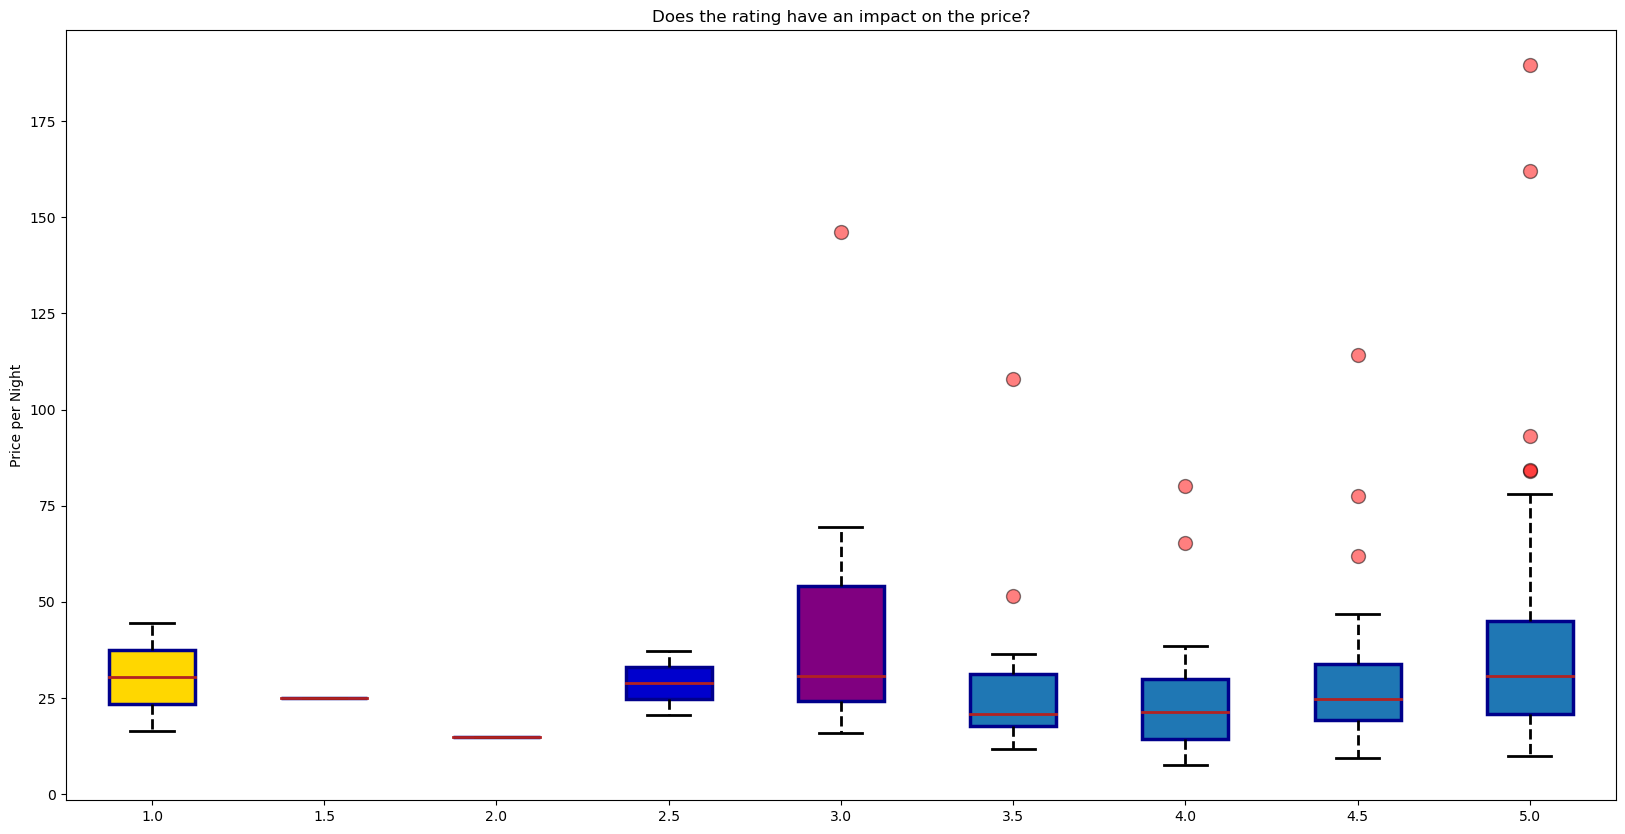

In [98]:
df_clean=df.copy()
df_clean = df_clean[df_clean['Rating Category'] != 0]

fig, ax = plt.subplots(figsize=(20, 10))
# sort the unique values of the Rating column in ascending order
ratings = sorted(df_clean["Rating Category"].unique())

boxprops = dict(linestyle='-', linewidth=2.5, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, alpha=0.5)
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='black')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')

bp = ax.boxplot(
    [df_clean[df_clean["Rating Category"]==grp]["Price person"] for grp in ratings],
    positions=np.arange(len(ratings)),
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    flierprops=flierprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops
)

colors = ['gold', 'darkorange', 'forestgreen', 'mediumblue', 'purple']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticks(np.arange(len(ratings)))
ax.set_xticklabels(ratings)
ax.set_ylabel("Price per Night")
ax.set_title("Does the rating have an impact on the price?")
plt.show()


**Interpretation of a box plot**
- The red line inside the rectangle shows the median: 

**Terminer interpretation plus dire qu'on peut faire avec un graph violin aussi, qui est genre la version améliorée de la boite à moustache**

#### B. Violin plot

Now that rating are grouped, let's look at the dispersion of the prices for each value of the rating.

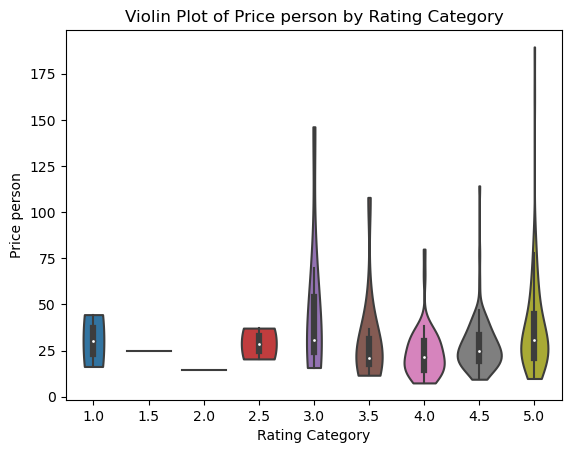

In [99]:
filtered_df = df[df['Rating Category'] != 0]

sns.violinplot(data=filtered_df, x='Rating Category', y='Price person',cut=0)
plt.xlabel('Rating Category')
plt.ylabel('Price person')
plt.title('Violin Plot of Price person by Rating Category')
plt.show()

**Interpretation of a violin plot**

The violin plot is a hybrid of a box plot and a kerner density plot. It represents the distribution of data. The difference with a box plot is that it can depict summary statistics and the density of each variables, and not only show summary statistics as a box plot does.

The white dot in the violin plot represent the median, the ticker gray bar the interquartile range and the thin gray bar the rest of the distribution, but does not include point determined as "outliers". 

Concerning the colored area, the wider the section is, the higher the probability that those values will be taken by the variables. And on the contrary, the skinnier the colored are, the lower the probability that a element will take this value.

**Interpretation of this violin plot**:
- We created the graph so that it does no go below 0 for the price because a negative price makes no sense.
- We saw with the scatter plot that there were some values higher especially around 4.5 and 5 rating stars. Thanks to the violin plot we can see that these high values have a low probability. 

The general conclusion that can be drawn of this analysis of the impact of the rating on the price is that there is not really a connection between the two, at least for the data in our sample. High prices accomodation do not tend to have a better rating, therefore are not better accomodation according to the previous customer. 
So when choosing an accomodation, the price is not a strong indicator of the quality according to previous customer.

We are aware that our sample is not very large so it is complicated to draw general conclusion, valide also outside the sample.

**Enter the rating of your lodging (X) and see what is the mean price for that rating:**

In [100]:
# Define the value of X
X = 4

# Convert 'Price per Night' column to numeric
df['Price person'] = pd.to_numeric(df['Price person'])

# Group the data by rating and compute the mean of the prices for each rating
mean_prices = df.groupby('Rating')['Price person'].mean()

# Loop over the ratings and print the mean price when the rating is X
for rating, mean_price in mean_prices.items():
    if rating == X:
        print(f"The mean price when the rating is {X} is {mean_price:.2f}")

The mean price when the rating is 4 is 24.93


## 2. Impact of the type of annoucement

### 2.1. Does the type of announcement have an impact on the price ?

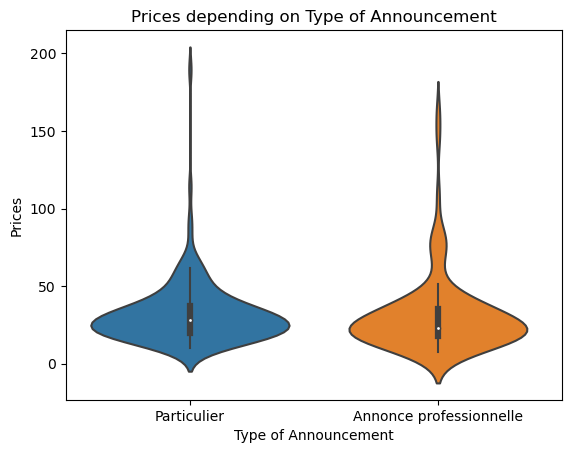

In [101]:
df_clean2 = df_clean[df_clean['Type of annoucement'] != 'rien']

sns.violinplot(x='Type of annoucement', y='Price person', data=df_clean2)

plt.title('Prices depending on Type of Announcement')
plt.xlabel('Type of Announcement')
plt.ylabel('Prices')
plt.show()

**Observation**

We can observe the presence of slightly higher prices when the announcement is published by private individuals, which is also shown by the mean prices of the two categories (see next command).

**The mean prices depending on the type of announcement:**

In [116]:
# Group the data by rating and compute the mean of the prices for each rating
mean_prices = df_clean2.groupby('Type of annoucement')['Price per Night'].mean()

# Print the mean prices for each rating
mean_prices

Type of annoucement
Annonce professionnelle    155.303922
Particulier                184.654321
Name: Price per Night, dtype: float64

### 2.2. Does the type of announcement have an impact on the rating ?

*Considering the positive relation we observed on the impact of the ratings on the price, and the tendancy of the price to be higher for the private announcements, we can expect the mean rating of the private annoncement to be higher.*

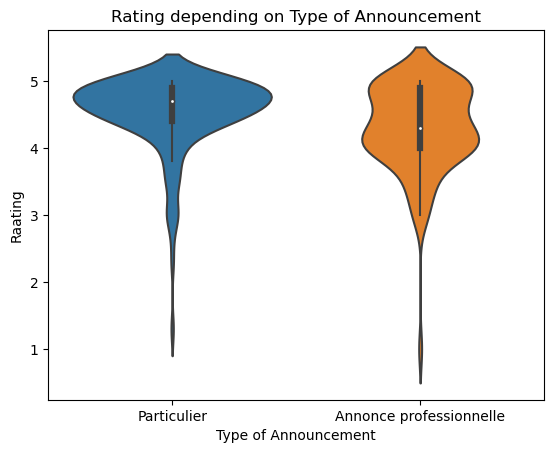

In [13]:
df_clean2 = df_clean[df_clean['Type of annoucement'] != 'rien']

sns.violinplot(x='Type of annoucement', y='Rating', data=df_clean2)

plt.title('Rating depending on Type of Announcement')
plt.xlabel('Type of Announcement')
plt.ylabel('Raating')
plt.show()

**According to the plot, we can conclude that the ratings of private ads are higher than the professional ones.** Therefore, if we consider that the rating is a measure of the quality, then the quality tend to be better for professionnal ads

In [14]:
#df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

mean_ratings = df_clean.groupby('Type of annoucement')['Rating'].mean()

# afficher les moyennes des ratings pour chaque rating status
print(mean_ratings)

Type of annoucement
Annonce professionnelle    4.289216
Particulier                4.536420
rien                       4.081250
Name: Rating, dtype: float64


## 3. Impact of the mention 'Premium'

### 3.1. Does the mention 'Premium' have an impact on the price ?

<AxesSubplot: xlabel='hote premium', ylabel='Price per Night'>

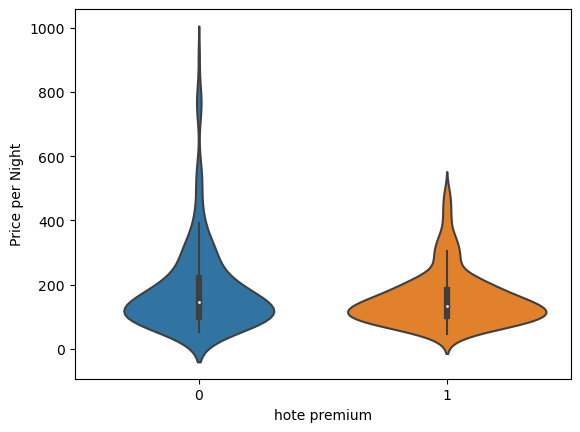

In [16]:
sns.violinplot(x='hote premium', y='Price per Night', data=df)

**Observation:**

There are a few observation wwith a higher price when the host is premium, but these ones have a very low probability. We cannot conclude that the premium mentionned on an ad leads to a higher price. To know whether it is worth it to pay attention to the premium mention, we should look at whether it is link to the rating. If it is the case, it means that premium ads have a higher rating, so better quality according to the previous customer, but without having a higher price. It would therefore be a sound criterion to look at when chosing and accommodation.

### 3.2. Does the mention 'Premium' have an impact on the rating ?

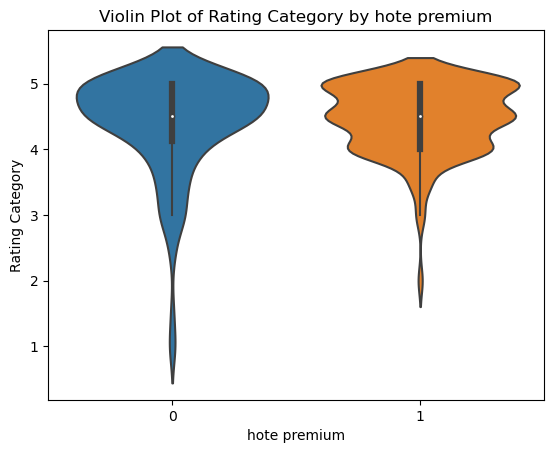

In [115]:
filtered_df = df[df['Rating Category'] != 0]

sns.violinplot(x='hote premium', y='Rating Category', data=filtered_df)
plt.xlabel('hote premium')
plt.ylabel('Rating Category')
plt.title('Violin Plot of Rating Category by hote premium')
plt.show()

**Observations**:

Premium ads tend to have less low rating than non premium one. 

# Maps

## Where are located our data

In [118]:
import folium

# Centrer la carte sur Bruxelles
map = folium.Map(location=[50.8466, 4.3517], zoom_start=8)

for Name, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        marker=folium.Marker(location=[row['latitude'], row['longitude']]).add_to(map)
        marker.add_child(folium.Popup(row['Name']))

# Afficher la carte
map

**Observations:**

A few locations stands out in terms of number of accommodation: the coast, the ardennes and some cities like Bruxelles and Antwerp.

## 5. Does the localisation have an impact on the price?

In [87]:
pip install HeatMap

  Using cached heatmap-2.2.1.zip (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\32498\AppData\Local\Temp\pip-install-5xbrzuf9\heatmap_665637055eeb44dc80a72f9e5614a9d8\setup.py", line 15
      print "On Windows, skipping build_ext."
            ^
  SyntaxError: Missing parentheses in call to 'print'. Did you mean print("On Windows, skipping build_ext.")?
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [119]:
from folium import plugins

m = folium.Map(location=[50.8466, 4.3517], zoom_start=7.5)

# Create a heatmap layer based on the price of each location
heatmap_data = []
for index, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        heatmap_data.append([row['latitude'], row['longitude'], row['Price per Night']])

title_html = '<h3 align="center" style="font-size:16px"><b>Map depending on price</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add the heatmap layer to the map
plugins.HeatMap(heatmap_data, name='Price heatmap').add_to(m)
m

In [ ]:
**

## 6. Does the localisation have an impact on the rating?

In [89]:
from folium import plugins

m2 = folium.Map(location=[50.8466, 4.3517], zoom_start=7.5)

# Create a heatmap layer based on the price of each location
heatmap_data_2 = []
for index, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        heatmap_data.append([row['latitude'], row['longitude'], row['Rating']])

title_html = '<h3 align="center" style="font-size:16px"><b>Map depending on rating</b></h3>'
m2.get_root().html.add_child(folium.Element(title_html))
# Add the heatmap layer to the map
plugins.HeatMap(heatmap_data, name='Rating heatmap').add_to(m2)
m2

**Once again, we can notice the similarities and the relation between the price and the rating.**

## Correlation

In [22]:
df_numerical = df.select_dtypes(include='float')
features= df_numerical.drop(columns=['Total Price'])#input
features.head()

,Price per Night,Rating,Appreciations,Number of Guests,Number of Bedrooms,Number of Beds,latitude,longitude
0,122.0,4.5,51.0,7.0,3.0,7.0,51.118739,2.634960
1,114.0,4.7,59.0,5.0,2.0,4.0,50.350609,5.493284
2,77.0,5.0,1.0,2.0,1.0,0.0,51.238941,2.972449
3,175.0,0.0,0.0,5.0,2.0,4.0,51.346426,3.275348
4,100.0,4.7,94.0,5.0,2.0,3.0,50.842350,4.383945


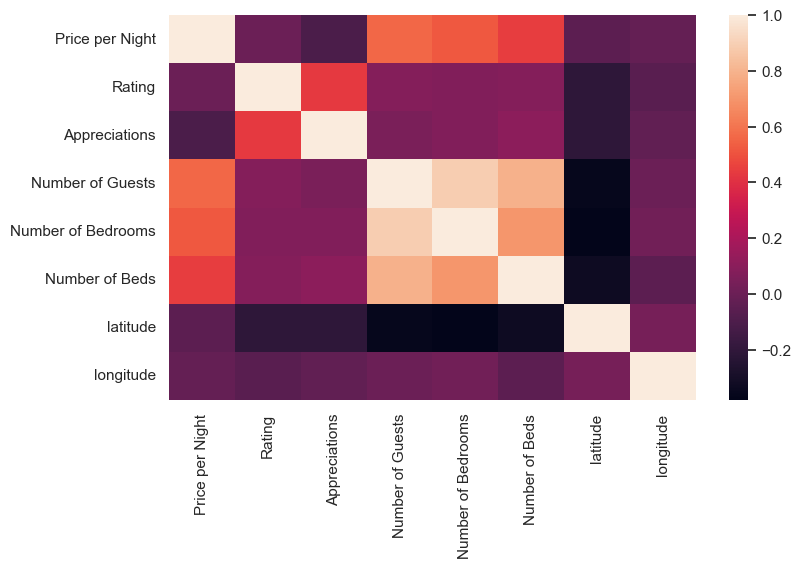

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#input
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = features.corr().round(2)#pq round (2)?
sns.heatmap(correlation_matrix) #annot=True
#heatmat c'est une fonction de seaborn
plt.show()

**One can notice the higher correlations between the price and the number of guests, the number of bedrooms and the number of beds, i.e. the impact of those variables on the price.**